## Dataset Preprocessing

Apply one hot encoding with pandas

In [1]:
import pandas as pd

from imblearn.over_sampling import SMOTE # class imbalance

from xgboost import XGBClassifier # xgboost

In [2]:
df_train = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
df_train

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742000,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342000,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641000,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654000,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670000,-26.858999,GEMI5_HUMAN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,S,False,False,False,False,False,False,False,False,False,...,-3,-0.1,2,-0.4,-19.742001,20.796000,-12.319000,AOC3_HUMAN,755,False
756,H,False,False,False,False,False,False,True,False,False,...,-358,-0.1,-330,-0.1,-16.299000,19.153999,-12.640000,AOC3_HUMAN,756,False
757,G,False,False,False,False,False,True,False,False,False,...,-360,-0.2,-1,-0.1,-13.404000,19.502001,-10.121000,AOC3_HUMAN,757,False
758,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-10.986000,20.320000,-13.016000,AOC3_HUMAN,758,False


In [3]:
df_train.dtypes

annotation_sequence     object
feat_A                    bool
feat_C                    bool
feat_D                    bool
feat_E                    bool
feat_F                    bool
feat_G                    bool
feat_H                    bool
feat_I                    bool
feat_K                    bool
feat_L                    bool
feat_M                    bool
feat_N                    bool
feat_P                    bool
feat_Q                    bool
feat_R                    bool
feat_S                    bool
feat_T                    bool
feat_V                    bool
feat_W                    bool
feat_Y                    bool
annotation_atomrec      object
feat_PHI               float64
feat_PSI               float64
feat_TAU               float64
feat_THETA             float64
feat_BBSASA            float64
feat_SCSASA            float64
feat_pLDDT             float64
feat_DSSP_H               bool
feat_DSSP_B               bool
feat_DSSP_E               bool
feat_DSS

In [4]:
df_train = pd.get_dummies(df_train,columns=["annotation_sequence"], prefix='Sequence')
df_train = pd.get_dummies(df_train,columns=["annotation_atomrec"], prefix='atomrec')
df_train

,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,...,atomrec_M,atomrec_N,atomrec_P,atomrec_Q,atomrec_R,atomrec_S,atomrec_T,atomrec_V,atomrec_W,atomrec_Y
0,False,False,False,False,False,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
3,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
756,False,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
757,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
758,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train['y_Ligand'].value_counts()

False    479912
True      17254
Name: y_Ligand, dtype: int64

In [6]:
df_train.drop(columns=['entry'],inplace=True)

In [7]:
df_train = df_train * 1
df_train.dtypes

feat_A       int64
feat_C       int64
feat_D       int64
feat_E       int64
feat_F       int64
             ...  
atomrec_S    uint8
atomrec_T    uint8
atomrec_V    uint8
atomrec_W    uint8
atomrec_Y    uint8
Length: 87, dtype: object

## Training

Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(["y_Ligand"], axis=1), df_train["y_Ligand"], test_size=0.2, random_state=42)

Apply resampling with smote

In [9]:
X_train, y_train = SMOTE(sampling_strategy=1/3.5).fit_resample(X_train, y_train)

In [10]:
xgb = XGBClassifier(
        learning_rate =0.1,
        n_estimators=5000,
        max_depth=11,
        min_child_weight=2,
        gamma=0.4,
        subsample=0.9,
        colsample_bytree=0.7,
        reg_alpha = 2.5e-6,
        objective= 'binary:logistic',
        tree_method='gpu_hist',
        scale_pos_weight=1,
        seed=27)

### Grid search for best hyperparameter

Commented out because all hyperparameters are finalized

In [11]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    "learning_rate": [0.01,0.05,0.10,0.15,0.20],
}
# gsearch1 = GridSearchCV(estimator = xgb, param_grid = param_test1, scoring='roc_auc',n_jobs=6, cv=5)
# gsearch1.fit(X_test,y_test)

In [12]:
#gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [13]:
xgb.fit(X_train, y_train, eval_metric='auc')

/home/ai/mambaforge/envs/keras/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=11, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=5000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=27, ...)

### Analysis

Finding the best threshold to maximize ROC-AUC and average of ROC-AUC and PR-AUC

In [14]:
from sklearn import metrics
y_test_res = xgb.predict_proba(X_test)[:, 1]
y_test_pred = y_test_res > 0.5

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr}")

ROC-AUC: 0.6289140284601223 
 PR-AUC 0.5367240095160903


In [15]:
auc_rocs = []
auc_prs = []
means = []
for i in range(100):
    print(i)
    y_test_pred = y_test_res > (i/100)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
    auc_roc = metrics.auc(fpr, tpr)

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
    auc_pr = metrics.auc(recall, precision)

    mean = (auc_pr + auc_roc) / 2

    print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr} \n Mean: {mean}")
    auc_rocs.append(auc_roc)
    auc_prs.append(auc_pr)
    means.append(mean)

0
ROC-AUC: 0.5 
 PR-AUC 0.5170766538608524 
 Mean: 0.5085383269304262
1
ROC-AUC: 0.7993457775878908 
 PR-AUC 0.46388939928626816 
 Mean: 0.6316175884370795
2
ROC-AUC: 0.7930615920312855 
 PR-AUC 0.4441963712841347 
 Mean: 0.6186289816577101
3
ROC-AUC: 0.7846276666448114 
 PR-AUC 0.4397692612091029 
 Mean: 0.6121984639269572
4
ROC-AUC: 0.77263552994372 
 PR-AUC 0.4355984777454303 
 Mean: 0.6041170038445751
5
ROC-AUC: 0.7633137419274875 
 PR-AUC 0.43695070140622433 
 Mean: 0.6001322216668559
6
ROC-AUC: 0.7550548368283059 
 PR-AUC 0.4396373435258205 
 Mean: 0.5973460901770632
7
ROC-AUC: 0.7481705716408731 
 PR-AUC 0.44360695781280124 
 Mean: 0.5958887647268372
8
ROC-AUC: 0.7421130490382304 
 PR-AUC 0.4489457305800559 
 Mean: 0.5955293898091432
9
ROC-AUC: 0.7364182914100231 
 PR-AUC 0.4545984271859946 
 Mean: 0.5955083592980088
10
ROC-AUC: 0.7293299268489889 
 PR-AUC 0.4568396378754408 
 Mean: 0.5930847823622148
11
ROC-AUC: 0.7239904344646068 
 PR-AUC 0.46072115734415564 
 Mean: 0.59235579

<function matplotlib.pyplot.show(close=None, block=None)>

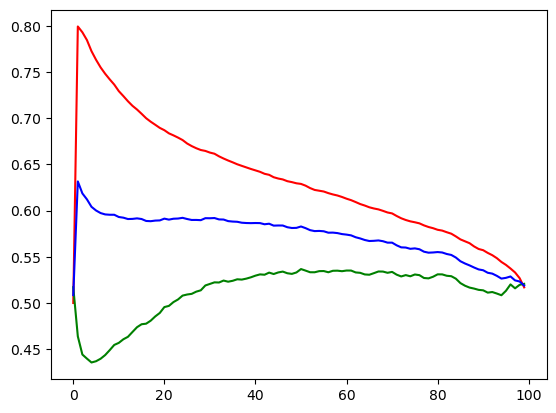

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)),auc_rocs,'r')
plt.plot(list(range(100)),auc_prs, 'g')
plt.plot(list(range(100)),means, 'b')
plt.show

## Submission

Apply preprocessing again to the test dataframe

In [17]:
df_test = pd.read_csv("af2_dataset_testset_unlabeled.csv.gz", index_col=0)
df_test = pd.get_dummies(df_test,columns=["annotation_sequence"], prefix='Sequence')
df_test = pd.get_dummies(df_test,columns=["annotation_atomrec"], prefix='atomrec')
df_test.drop(columns=['entry'],inplace=True)
df_test

,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,...,atomrec_M,atomrec_N,atomrec_P,atomrec_Q,atomrec_R,atomrec_S,atomrec_T,atomrec_V,atomrec_W,atomrec_Y
0,False,False,False,False,False,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
4,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,False,False,False,False,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
475,False,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
476,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
477,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Use threshold of 0.01

In [18]:
y_test_submission = xgb.predict_proba(X_test)[:, 1] > 0.01

In [19]:
s = pd.Series(y_test_submission).astype(bool)
s.name = "Predicted"
s.to_csv("submission.csv")